# Summary


# Summary

<p>
This is a use case for Plotly Dash.<br>
It creates a sales dashboard for world wide e-commerce data.<br>
According to Wordnik a dashboard is <br>
"a user interface on a computer display that presents constantly updated information, such as processing speed, in a format that resembles the dashboard of a vehicle."<br>
This sales dashboard is intuitively understandable.    
<p>

<p>
On a technical level this project applies Plotly and JupyterDash for data visualization and web deployment.<br>
It is also applying HTML and CSS to structure and style the dashboard.
</p>

<p>
This notebook is part of larger project consisting of a portfolio of notebooks testing out different versions of the sales dashboard.<br>
This notebook checksout if JupyterDash is correctly installed and read to roll.<br>
There is also a dedicated notebook for importing and cleaning the data.<br>
The cleaned data can immediately used in the JupyterDash notebooks.<br>
It is followed up by another project adding interactivity to the sales dashboard.<br>
Then users can get particular information by sliding or klicking on graphic elements.<br>
</p>

<p>
Dash made a great job bringing Dash to Jupyter.<br>
Normally you would develop and start Dash from an IDE and the command line.<br>
As this project is a demonstration of Dash capabilities JupyterDash was chosen.<br>
The Dash app is here displayed inside the notebook, but there are other notebook versions, which starts the app with link at the end of the output into a website.<br>
One last word: <b>Dash needs Javascript to be installed on the machine to work.</b>
</p>

# Importing packages

In [1]:
# Base packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  
import seaborn as sns
import os

### Plotly

In [2]:
import ipywidgets

In [3]:

from plotly.offline import init_notebook_mode
init_notebook_mode(connected = True)

# plotly.offline.init_notebook_mode(connected=True)

# plotly
import plotly
import plotly.express as px
# plotly.tools.set_credentials_file(username = 'lathkar', api_key = '************')


# Set notebook mode to work in offline
#pyo.init_notebook_mode()

import plotly.io as pio

import chart_studio.plotly as py
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Set notebook mode to work in offline
import plotly.offline as pyo
#pyo.init_notebook_mode()

#import plotly.io as pio
print(pio.renderers)

pio.renderers.default = 'jupyterlab'


plotly.offline.init_notebook_mode(connected=True)

Renderers configuration
-----------------------
    Default renderer: 'plotly_mimetype+notebook_connected'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery', 'sphinx_gallery_png']



#### Node.js
<p>
Do not forget to install node.js on your machine and in the env.<br>
Otherwise inline plotly plots will not render.<br>
https://jupyterlab.readthedocs.io/en/stable/user/extensions.html#using-the-extension-manager
</p>

### Testing Plotly within JupyterLab
<p>Plotly works!</p>


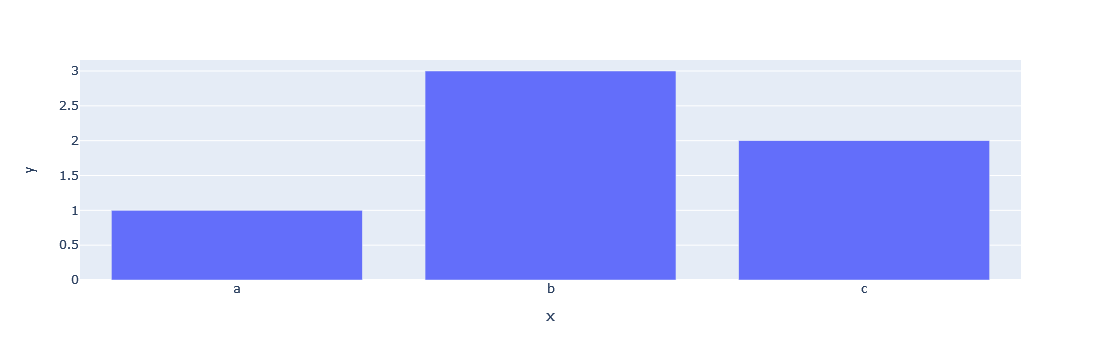

In [4]:
fig = px.bar(x=["a", "b", "c"], y=[1, 3, 2])
fig.show()

### Dash

In [5]:
import dash
import dash_core_components as dcc
import dash_html_components as html


# from dash import dcc
# from dash import html
from dash import Dash

from jupyter_dash import JupyterDash
# from dash import dcc
# import dash_core_components as dcc - depreciated
# from dash import html
# import dash_html_components as html - depreciated

from dash.dependencies import Input, Output


#### Checking current working directory

In [6]:
# %%cmd
# cd

cwd=os.getcwd()
# print(cwd)

In [7]:
#### Checking versions

!python --version
!conda --version

print("Pandas: {}".format(pd.__version__))
print("Numpy: {}".format(np.__version__))
print("Seaborn {}".format(sns.__version__))

Python 3.10.0
conda 4.12.0
Pandas: 1.4.1
Numpy: 1.21.5
Seaborn 0.11.2


### Creating an requirements file

In [8]:
%%capture
%%cmd 
mkdir txt

In [9]:
!conda list > txt/requirements_dash_dashboards.txt
!jupyter --version > txt/jupyter_version.txt

# Creating the JupyterDash app
<p>and running it on a local sever instance in a developing environment.</p>

In [10]:
# from dash import Dash, dcc, html, Input, Output
# import plotly.graph_objects as go
# import numpy as np

app = JupyterDash(__name__)

app.layout = html.Div([
    html.H4('Interactive plot with custom data source'),
    dcc.Graph(id="graph"),
    html.P("Number of bars:"),
    dcc.Slider(id="slider", min=2, max=10, value=4, step=1),
])


@app.callback(
    Output("graph", "figure"), 
    Input("slider", "value"))
def update_bar_chart(size):
    data = np.random.normal(3, 2, size=size) # replace with your own data source
    fig = go.Figure(
        data=[go.Bar(y=data)],
        layout_title_text="Native Plotly rendering in Dash"
    )
    return fig

app.run_server(debug=True, port=8049)

Dash app running on http://127.0.0.1:8049/


In [11]:
%tb


No traceback available to show.
